In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib inline
%matplotlib inline

In [2]:
# Read data from csv file and return a pandas dataframe
def read_data(filename):
    df = pd.read_csv(filename)
    return df

In [3]:
df = read_data('Taxi.csv')
# Z-normalization of value column
df['value'] = (df['value'] - df['value'].mean()) / df['value'].std()

<AxesSubplot:title={'center':'Taxi Data'}, xlabel='timestamp'>

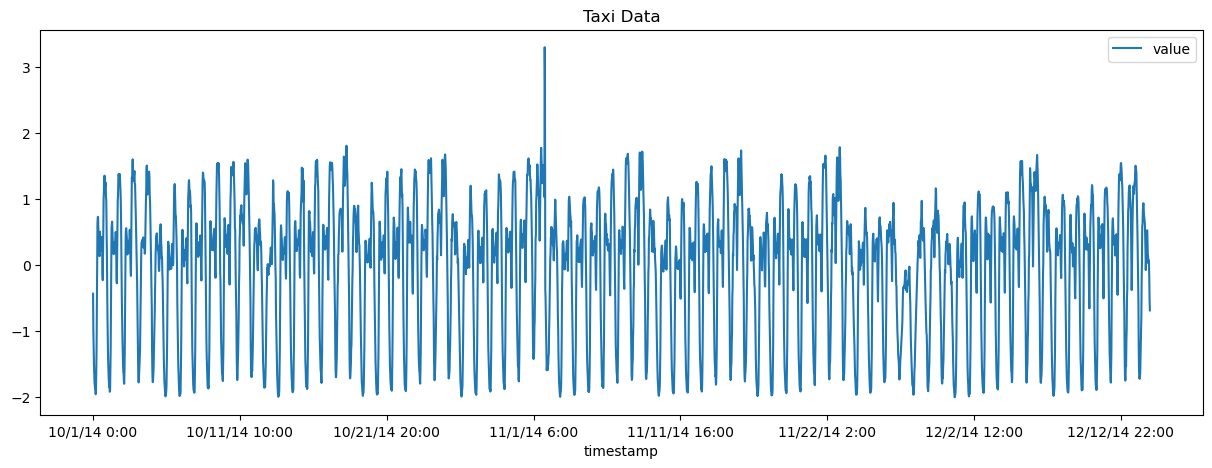

In [4]:
df.plot(x='timestamp', y='value', figsize=(15, 5), title='Taxi Data')

In [5]:
df

,timestamp,value
0,10/1/14 0:00,-0.435588
1,10/1/14 0:30,-0.997981
2,10/1/14 1:00,-1.246711
3,10/1/14 1:30,-1.493464
4,10/1/14 2:00,-1.644226
...,...,...
3595,12/14/14 21:30,0.071610
3596,12/14/14 22:00,0.010769
3597,12/14/14 22:30,-0.213115
3598,12/14/14 23:00,-0.533132


In [6]:
# Compute kurtosis of value column
kurtosis = df['value'].kurtosis()
print('Kurtosis: ', kurtosis)

Kurtosis:  -0.7096624351560346


In [7]:
window_length = 1

kurtosis_list = []

# For window length from 1 to 20% of the data length, use SMA to smooth the data and then compute the kurtosis
for window_length in range(1, int(len(df) * 0.4)):
    df['value_sma'] = df['value'].rolling(window=window_length).mean()
    kurtosis = df['value_sma'].kurtosis()
    kurtosis_list.append(kurtosis)

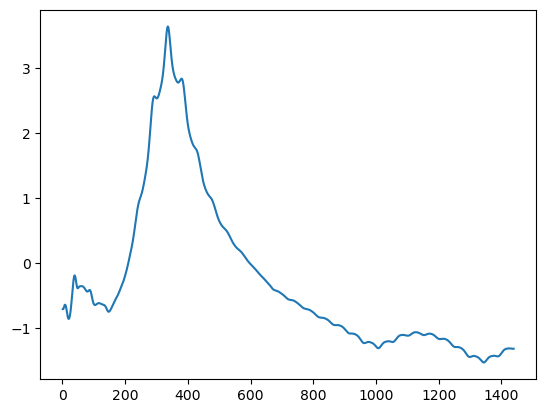

In [8]:
# Plot the kurtosis values
plt.plot(range(1, int(len(df) * 0.4)), kurtosis_list)

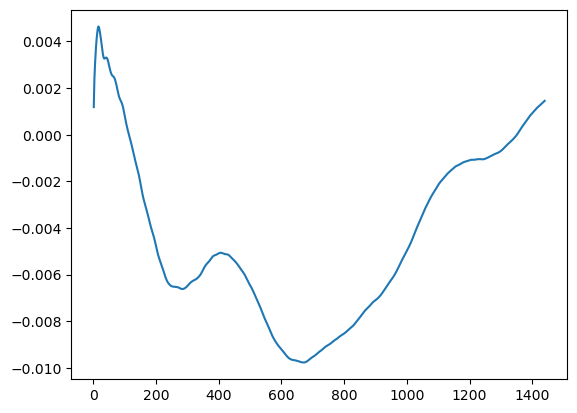

In [9]:
window_length = 1
signal_to_noise_list = []

# For window length from 1 to 20% of the data length, use SMA to smooth the data and then compute the signal to noise ratio
for window_length in range(1, int(len(df) * 0.4)):
    df['value_sma'] = df['value'].rolling(window=window_length).mean()
    df['value_std'] = df['value'].rolling(window=window_length).std()
    signal_to_noise = df['value_sma'].mean() / df['value_std'].mean()
    signal_to_noise_list.append(signal_to_noise)

# Plot the signal to noise ratio values
plt.plot(range(1, int(len(df) * 0.4)), signal_to_noise_list)

  Using cached antropy-0.1.4.tar.gz (16 kB)
  Preparing metadata (setup.py) ... done
  Using cached stochastic-0.7.0-py3-none-any.whl (48 kB)
  Created wheel for antropy: filename=antropy-0.1.4-py3-none-any.whl size=16150 sha256=20a004957773d0ff4a804584b8bfb088b6e399642cb141764b69f34c92eaf0be
  Stored in directory: /Users/sankalpsangle/Library/Caches/pip/wheels/65/09/09/48a504241a5aaa94558b499f853b51aff12e6e1a59e28f5cfc
Successfully built antropy


ImportError: dlopen(/opt/miniconda3/envs/8803MDS/lib/python3.9/site-packages/scipy/spatial/_qhull.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib
  Referenced from: <487B78B9-27ED-3D37-8618-0F067C5E2404> /opt/miniconda3/envs/8803MDS/lib/python3.9/site-packages/scipy/spatial/_qhull.cpython-39-darwin.so
  Reason: tried: '/opt/miniconda3/envs/8803MDS/lib/python3.9/site-packages/scipy/spatial/../../../../liblapack.3.dylib' (no such file), '/opt/miniconda3/envs/8803MDS/lib/python3.9/site-packages/scipy/spatial/../../../../liblapack.3.dylib' (no such file), '/opt/miniconda3/envs/8803MDS/bin/../lib/liblapack.3.dylib' (no such file), '/opt/miniconda3/envs/8803MDS/bin/../lib/liblapack.3.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS@rpath/liblapack.3.dylib' (no such file), '/opt/miniconda3/envs/8803MDS/lib/python3.9/site-packages/scipy/spatial/../../../../liblapack.3.dylib' (no such file), '/opt/miniconda3/envs/8803MDS/lib/python3.9/site-packages/scipy/spatial/../../../../liblapack.3.dylib' (no such file), '/opt/miniconda3/envs/8803MDS/bin/../lib/liblapack.3.dylib' (no such file), '/opt/miniconda3/envs/8803MDS/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)